# Introduction

For starters we will use ten different actors, denoted by different video id:s.


We will apply LOGO CV (Leave One Group Out cross-validation)

We will later have to take into account variables like mode (prosody or vocalization) and intensity (1-4) in the cross validation scheme. 

However for the first run it will be fine to include all without taking such factors into account.



In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import scipy
from dotenv import load_dotenv

# Working dir

In [2]:
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.sql_handling.execute_sql import execute_sql_pandas

# Paths

In [4]:
load_dotenv()

# path to save figures
output_path = os.getenv("VIDEO_OUT")

# Global configuration path
glob_conf_path = '../global_config.py'

# Load global variables

In [5]:
exec(open(glob_conf_path).read())

# Select data from DB

We only select data that satisfies following three conditions:

* Success == 1
* Confidence rate >= 0.98
* mix (mixed emotions) = False(0)

We also only select the following six video_ids: 'A101', 'A102', 'A18', 'A200'

In [6]:
query = """SELECT filename,
video_id,
emotion_1,
emotion_1_id,
AU01_r,
AU02_r,
AU04_r,
AU05_r,
AU06_r,
AU07_r,
AU09_r,
AU10_r,
AU12_r,
AU14_r,
AU15_r,
AU17_r,
AU20_r,
AU23_r,
AU25_r,
AU26_r,
AU45_r
FROM openface
WHERE success = 1 
AND confidence >= 0.98 
AND mix = 0
AND (intensity_level = 4 OR emotion_1 = 'neu')
AND situation = 1 
AND mode = 'v'
AND video_id IN ('A101', 'A102', 'A18', 'A200', 'A303', 'A227', 'A21', 'A18');"""
df, read_duration = execute_sql_pandas(query)

In [7]:
print("query executed in: {} seconds".format(read_duration))

query executed in: 44.096 seconds


In [8]:
df

,filename,video_id,emotion_1,emotion_1_id,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,A227_neg_sur_v_4,A227,neg_sur,11,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.32,0.00,0.72,2.44,0.0
1,A227_neg_sur_v_4,A227,neg_sur,11,0.00,0.00,0.00,0.28,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.23,0.06,0.82,2.09,0.0
2,A227_neg_sur_v_4,A227,neg_sur,11,0.00,0.00,0.00,0.47,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.28,0.10,0.93,1.92,0.0
3,A227_neg_sur_v_4,A227,neg_sur,11,0.00,0.00,0.00,0.60,0.00,0.05,...,0.00,0.00,0.00,0.0,0.00,0.36,0.09,1.07,1.79,0.0
4,A227_neg_sur_v_4,A227,neg_sur,11,0.00,0.00,0.00,0.36,0.00,0.05,...,0.00,0.00,0.00,0.0,0.00,0.40,0.09,1.16,1.87,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71403,A303_sad_v_4,A303,sad,6,1.00,0.09,0.56,0.00,0.93,1.03,...,2.03,1.13,0.40,0.0,1.11,0.00,0.08,0.00,0.90,0.0
71404,A303_sad_v_4,A303,sad,6,0.63,0.44,0.42,0.01,0.30,0.14,...,0.94,0.50,0.31,0.0,0.74,0.00,0.00,0.00,0.46,0.0
71405,A303_sad_v_4,A303,sad,6,0.65,0.45,0.51,0.29,0.18,0.00,...,0.84,0.44,0.35,0.0,0.67,0.00,0.00,0.00,0.47,0.0
71406,A303_sad_v_4,A303,sad,6,1.56,1.05,0.77,0.63,0.00,0.00,...,0.67,0.38,1.14,0.0,1.50,0.00,0.00,0.00,1.16,0.0


Total number of instances: 71408

Number of Instances per File (before data cleaning)
A101_neu_sit1_v     800
A102_mov_v_4        681
A102_sad_v_4        644
A102_reg_v_4        598
A102_hap_v_4        507
                   ... 
A303_ang_v_4         69
A303_pos_sur_v_4     68
A303_hap_v_4         57
A21_fea_v_4          55
A303_tri_v_4         44
Name: filename, Length: 305, dtype: int64



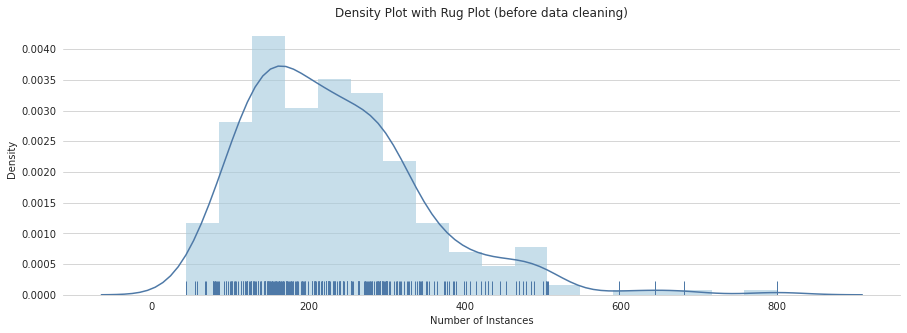


Number of Instances per Video id (before data cleaning)
A102    17227
A101    12670
A227    10639
A200     9761
A18      9266
A303     6384
A21      5461
Name: video_id, dtype: int64


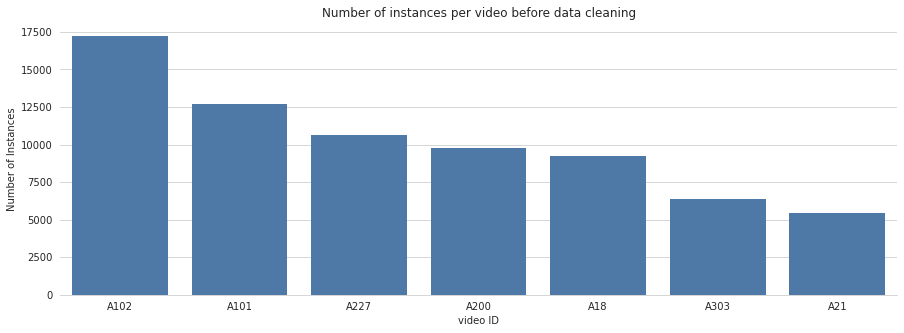


Number of Instances per Emotion (before data cleaning)
gui        2177
dou        2137
mov        2109
amu        2045
sad        1954
ele        1897
anx        1876
conf       1811
neu        1810
ins        1798
bor        1775
nos        1770
pea        1733
sha        1730
scha       1726
rel        1704
disa       1698
rej        1682
awe        1681
neg_sur    1679
env        1657
reg        1651
sat        1613
emb        1576
ten        1551
exc        1541
conc       1541
ple        1512
cont       1485
hop        1482
sar        1471
pri        1462
pos_sur    1449
hap        1425
dist       1420
sex        1419
fea        1414
int        1364
tri        1328
adm        1314
gra        1285
disg       1252
det        1227
ang        1177
Name: emotion_1, dtype: int64


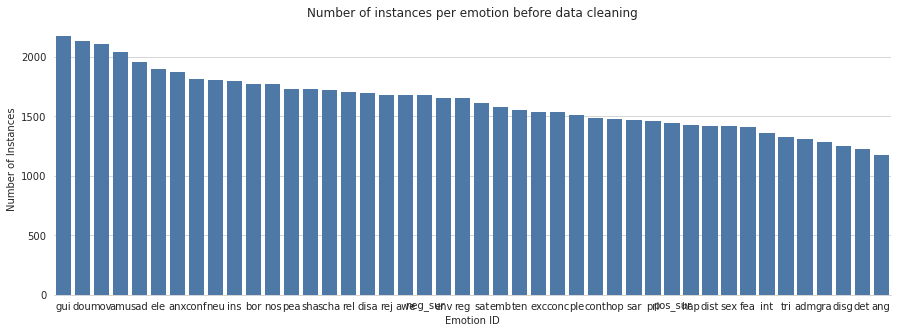

In [9]:
print("Total number of instances: {}".format(len(df)))
print()


print("Number of Instances per File (before data cleaning)")
file_val_counts_original = df["filename"].value_counts()
print(file_val_counts_original)
print()


x = file_val_counts_original.values
plt.figure(figsize=(15,5))
sns.distplot(x, rug=True, norm_hist=True,
             rug_kws={'color': blue_shades[0],'alpha':1},
             kde_kws={'color': blue_shades[0],'alpha':1},
             hist_kws={'color': blue_shades[1], 'alpha':0.6}
            )
plt.xlabel('Number of Instances')
plt.ylabel('Density')
plt.grid(False,axis='x')
plt.savefig(os.path.join(output_path,'charts','report_distribution_before_cleaning.svg'), bbox_inches = 'tight')
plt.title('Density Plot with Rug Plot (before data cleaning)')
plt.savefig(os.path.join(output_path,'charts','distribution_before_cleaning.svg'), bbox_inches = 'tight')
plt.show()
print()


print("Number of Instances per Video id (before data cleaning)")
video_val_counts_original = df["video_id"].value_counts()
print(video_val_counts_original)
plt.figure(figsize=(15,5))
sns.barplot(video_val_counts_original.index, video_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title("Number of instances per video before data cleaning")
plt.xlabel('video ID')
plt.ylabel('Number of Instances')
plt.show()
print()


print("Number of Instances per Emotion (before data cleaning)")
emotion_val_counts_original = df["emotion_1"].value_counts()
print(emotion_val_counts_original)
plt.figure(figsize=(15,5))
sns.barplot(emotion_val_counts_original.index, emotion_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title("Number of instances per emotion before data cleaning")
plt.xlabel('Emotion ID')
plt.ylabel('Number of Instances')
#plt.xticks(rotation=45)
plt.show()
print()

Lets see how many files we have per video id

In [10]:
print("Number of Instances per video id for every filename")
video_val_counts_original = df[['video_id','filename']].groupby(["video_id"]).filename.nunique().reset_index()
print(video_val_counts_original)
print()

Number of Instances per video id for every filename
  video_id  filename
0     A101        44
1     A102        44
2      A18        43
3     A200        43
4      A21        43
5     A227        44
6     A303        44



# From time series data to average features

In [11]:
from scipy.signal import find_peaks

def my_find_peaks(x):
    """
    This function takes a 1-D array and finds all local maxima by simple comparison of neighboring values. 
    Optionally, a subset of these peaks can be selected by specifying conditions for a peak’s properties.
    """
    th = x.mean()
    val = x.values
    peaks, _ = find_peaks(val, height=th)
    return len(peaks)

In [12]:
df_tmp = df.drop(columns=["video_id", "emotion_1", "emotion_1_id"])

# Compute statistical measures 
df_tmp = df_tmp.groupby(['filename']).agg(['mean',                                    # Arithmetic mean
                                          lambda x: scipy.stats.variation(x),        # Coefficient of variation
                                          lambda x: np.percentile(x, q=20),          # 20th percentile, i.e. below this value 20% of the observations will be found
                                          lambda x: np.percentile(x, q=50),          # 50th percentile, i.e. below this value 50% of the observations will be found
                                          lambda x: np.percentile(x, q=80),          # 80th percentile, i.e. below this value 80% of the observations will be found
                                          lambda x: scipy.stats.iqr(x, rng=(20,80)), # IQR(60%) = 80th percentile - 20th percentile
                                          lambda x: my_find_peaks(x),                # Number of peaks above the adaptive threshold
                                          ]).reset_index().sort_values(by=['filename'], ignore_index=True)

# Rename columns
df_tmp.rename(columns={'<lambda_0>': 'stddevNorm',
                       '<lambda_1>': 'percentile20.0',
                       '<lambda_2>': 'percentile50.0',
                       '<lambda_3>': 'percentile80.0',
                       '<lambda_4>': 'iqr60_80-20',
                       '<lambda_5>': 'numPeaks',
                      }, level=1,inplace=True)

# Impute NaN values
# There might be some NaN values in the dataframe coming from the coefficient of variation (std(x)/mean(x) when mean(x)=0) 
df_tmp.fillna(0, inplace=True)

# Collapse hierarchical index in columns
df_tmp.columns = ['_'.join(col).strip('_') for col in df_tmp.columns.values]

# check for null values
df_tmp.isnull().values.any()

/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesi

False

In [13]:
df_tmp

,filename,AU01_r_mean,AU01_r_stddevNorm,AU01_r_percentile20.0,AU01_r_percentile50.0,AU01_r_percentile80.0,AU01_r_iqr60_80-20,AU01_r_numPeaks,AU02_r_mean,AU02_r_stddevNorm,...,AU26_r_percentile80.0,AU26_r_iqr60_80-20,AU26_r_numPeaks,AU45_r_mean,AU45_r_stddevNorm,AU45_r_percentile20.0,AU45_r_percentile50.0,AU45_r_percentile80.0,AU45_r_iqr60_80-20,AU45_r_numPeaks
0,A101_adm_v_4,0.054555,1.286625,0.0,0.020,0.120,0.120,24,0.027397,1.718149,...,0.528,0.528,23,0.163356,2.433615,0.0,0.000,0.250,0.250,13
1,A101_amu_v_4,0.136936,1.628151,0.0,0.010,0.350,0.350,30,0.043135,1.825089,...,0.750,0.750,30,0.536247,1.807256,0.0,0.000,1.550,1.550,15
2,A101_ang_v_4,0.113173,1.527733,0.0,0.020,0.200,0.200,25,0.044465,1.827524,...,1.680,1.650,13,0.059705,1.176699,0.0,0.040,0.110,0.110,41
3,A101_anx_v_4,0.209826,2.047194,0.0,0.020,0.190,0.190,11,0.192753,2.818654,...,1.270,1.270,27,0.134007,1.623588,0.0,0.000,0.278,0.278,14
4,A101_awe_v_4,0.072604,1.286648,0.0,0.030,0.130,0.130,25,0.043854,1.970081,...,0.300,0.280,23,0.118646,1.490133,0.0,0.020,0.318,0.318,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,A303_scha_v_4,0.215443,1.582454,0.0,0.025,0.386,0.386,10,0.143228,2.060053,...,1.202,1.202,20,0.178924,1.765019,0.0,0.030,0.280,0.280,8
301,A303_sex_v_4,0.107240,1.385764,0.0,0.010,0.220,0.220,15,0.070469,1.963292,...,1.452,1.452,19,0.163281,1.445751,0.0,0.000,0.370,0.370,15
302,A303_sha_v_4,0.127730,1.687920,0.0,0.060,0.196,0.196,10,0.048834,1.731987,...,1.016,1.016,10,0.410429,1.871078,0.0,0.000,0.656,0.656,7
303,A303_ten_v_4,0.134167,1.441382,0.0,0.040,0.300,0.300,10,0.087292,1.962050,...,0.384,0.384,21,0.347083,1.648157,0.0,0.010,0.642,0.642,6


# Normalize training set

Merge on filename index... Merge with metadata afterwards...

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

In [14]:
from sklearn import preprocessing

# create a separate dataframe to keep track of index
df_filename = df_tmp[["filename"]]

# get only features
X = df_tmp.drop(columns=['filename'])

min_max_scaler = preprocessing.MinMaxScaler()

# Fit and transform features
X_scaled = min_max_scaler.fit_transform(X)

# Create a dataframe from normalized features
X_scaled_df = pd.DataFrame(data=X_scaled, columns=X.columns.to_list())

# join back on index with filename dataframe
X_scaled_df = df_filename.join(X_scaled_df)

In [15]:
X_scaled_df

,filename,AU01_r_mean,AU01_r_stddevNorm,AU01_r_percentile20.0,AU01_r_percentile50.0,AU01_r_percentile80.0,AU01_r_iqr60_80-20,AU01_r_numPeaks,AU02_r_mean,AU02_r_stddevNorm,...,AU26_r_percentile80.0,AU26_r_iqr60_80-20,AU26_r_numPeaks,AU45_r_mean,AU45_r_stddevNorm,AU45_r_percentile20.0,AU45_r_percentile50.0,AU45_r_percentile80.0,AU45_r_iqr60_80-20,AU45_r_numPeaks
0,A101_adm_v_4,0.014113,0.139058,0.0,0.333333,0.017277,0.017277,0.489362,0.008567,0.191022,...,0.111175,0.119429,0.338983,0.083911,0.647255,0.0,0.000000,0.043367,0.043367,0.282051
1,A101_amu_v_4,0.094724,0.427910,0.0,0.166667,0.096752,0.096752,0.617021,0.050020,0.254500,...,0.174785,0.182857,0.457627,0.356431,0.337465,0.0,0.000000,0.375000,0.375000,0.333333
2,A101_ang_v_4,0.071472,0.342980,0.0,0.333333,0.044921,0.044921,0.510638,0.053521,0.255946,...,0.441261,0.440000,0.169492,0.008159,0.025598,0.0,0.571429,0.007653,0.007653,1.000000
3,A101_anx_v_4,0.166048,0.782325,0.0,0.333333,0.041465,0.041465,0.212766,0.444097,0.844272,...,0.323782,0.331429,0.406780,0.062461,0.246624,0.0,0.000000,0.050510,0.050510,0.307692
4,A101_awe_v_4,0.031775,0.139077,0.0,0.500000,0.020733,0.020733,0.510638,0.051913,0.340566,...,0.045845,0.048571,0.338983,0.051235,0.180619,0.0,0.285714,0.060714,0.060714,0.230769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,A303_scha_v_4,0.171544,0.389261,0.0,0.416667,0.109191,0.109191,0.191489,0.313653,0.393972,...,0.304298,0.312000,0.288136,0.095288,0.316575,0.0,0.428571,0.051020,0.051020,0.153846
301,A303_sex_v_4,0.065666,0.222907,0.0,0.166667,0.051831,0.051831,0.297872,0.122013,0.336536,...,0.375931,0.383429,0.271186,0.083856,0.158668,0.0,0.000000,0.073980,0.073980,0.333333
302,A303_sha_v_4,0.085716,0.478462,0.0,1.000000,0.043538,0.043538,0.191489,0.065030,0.199236,...,0.251003,0.258857,0.118644,0.264480,0.369030,0.0,0.000000,0.146939,0.146939,0.128205
303,A303_ten_v_4,0.092014,0.269947,0.0,0.666667,0.079475,0.079475,0.191489,0.166323,0.335799,...,0.069914,0.078286,0.305085,0.218184,0.258776,0.0,0.142857,0.143367,0.143367,0.102564


In [16]:
# get the metadata from original dataframe
df_metadata = df[["filename", "video_id", "emotion_1_id"]]

# drop all duplicate rows, will collapse dataframe to unique filenames
df_metadata = df_metadata.drop_duplicates()

# merge metadata with temporary dataframe
train_scaled_df = pd.merge(X_scaled_df, df_metadata, on="filename")

In [17]:
train_scaled_df

,filename,AU01_r_mean,AU01_r_stddevNorm,AU01_r_percentile20.0,AU01_r_percentile50.0,AU01_r_percentile80.0,AU01_r_iqr60_80-20,AU01_r_numPeaks,AU02_r_mean,AU02_r_stddevNorm,...,AU26_r_numPeaks,AU45_r_mean,AU45_r_stddevNorm,AU45_r_percentile20.0,AU45_r_percentile50.0,AU45_r_percentile80.0,AU45_r_iqr60_80-20,AU45_r_numPeaks,video_id,emotion_1_id
0,A101_adm_v_4,0.014113,0.139058,0.0,0.333333,0.017277,0.017277,0.489362,0.008567,0.191022,...,0.338983,0.083911,0.647255,0.0,0.000000,0.043367,0.043367,0.282051,A101,5
1,A101_amu_v_4,0.094724,0.427910,0.0,0.166667,0.096752,0.096752,0.617021,0.050020,0.254500,...,0.457627,0.356431,0.337465,0.0,0.000000,0.375000,0.375000,0.333333,A101,13
2,A101_ang_v_4,0.071472,0.342980,0.0,0.333333,0.044921,0.044921,0.510638,0.053521,0.255946,...,0.169492,0.008159,0.025598,0.0,0.571429,0.007653,0.007653,1.000000,A101,12
3,A101_anx_v_4,0.166048,0.782325,0.0,0.333333,0.041465,0.041465,0.212766,0.444097,0.844272,...,0.406780,0.062461,0.246624,0.0,0.000000,0.050510,0.050510,0.307692,A101,34
4,A101_awe_v_4,0.031775,0.139077,0.0,0.500000,0.020733,0.020733,0.510638,0.051913,0.340566,...,0.338983,0.051235,0.180619,0.0,0.285714,0.060714,0.060714,0.230769,A101,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,A303_scha_v_4,0.171544,0.389261,0.0,0.416667,0.109191,0.109191,0.191489,0.313653,0.393972,...,0.288136,0.095288,0.316575,0.0,0.428571,0.051020,0.051020,0.153846,A303,15
301,A303_sex_v_4,0.065666,0.222907,0.0,0.166667,0.051831,0.051831,0.297872,0.122013,0.336536,...,0.271186,0.083856,0.158668,0.0,0.000000,0.073980,0.073980,0.333333,A303,24
302,A303_sha_v_4,0.085716,0.478462,0.0,1.000000,0.043538,0.043538,0.191489,0.065030,0.199236,...,0.118644,0.264480,0.369030,0.0,0.000000,0.146939,0.146939,0.128205,A303,43
303,A303_ten_v_4,0.092014,0.269947,0.0,0.666667,0.079475,0.079475,0.191489,0.166323,0.335799,...,0.305085,0.218184,0.258776,0.0,0.142857,0.143367,0.143367,0.102564,A303,28


# Create groups for LOGO CV

We will apply LOGO CV (Leave One Group Out cross-validation)

In [18]:
train_scaled_df.video_id.unique()

array(['A101', 'A102', 'A18', 'A200', 'A21', 'A227', 'A303'], dtype=object)

In [19]:
def get_evens(size):
    ret = []
    for n in range(size):
        if n % 2 == 0:
            ret.append(n)
    return ret

def get_odds(size):
    ret = []
    for n in range(size):
        if n % 2 == 1:
            ret.append(n)
    return ret

In [20]:
import random

video_ids = train_scaled_df.video_id.unique()

# Find random pairs of video_ids
random.seed(seed)

# a list of even numbers
video_ids_1 = get_evens(len(video_ids))

# a list of odd numbers
video_ids_2 = get_odds(len(video_ids))

# shuffle the odd numbers
video_ids_2_shuffled = random.sample(video_ids_2, len(video_ids_2))

# assign groups for video ids by using odd and even numbers respectively
groups = {}
for i, video_id in enumerate(video_ids_1):
    groups[video_ids[video_id]] = i
    
for i, video_id in enumerate(video_ids_2_shuffled):
    groups[video_ids[video_id]] = i
    
print(groups)

# Create a copy
train_scaled_groups_df = train_scaled_df.copy()

# Insert group column
train_scaled_groups_df['group'] = train_scaled_groups_df['video_id'].map(groups)

{'A101': 0, 'A18': 1, 'A21': 2, 'A303': 3, 'A227': 0, 'A200': 1, 'A102': 2}


In [21]:
train_scaled_groups_df

,filename,AU01_r_mean,AU01_r_stddevNorm,AU01_r_percentile20.0,AU01_r_percentile50.0,AU01_r_percentile80.0,AU01_r_iqr60_80-20,AU01_r_numPeaks,AU02_r_mean,AU02_r_stddevNorm,...,AU45_r_mean,AU45_r_stddevNorm,AU45_r_percentile20.0,AU45_r_percentile50.0,AU45_r_percentile80.0,AU45_r_iqr60_80-20,AU45_r_numPeaks,video_id,emotion_1_id,group
0,A101_adm_v_4,0.014113,0.139058,0.0,0.333333,0.017277,0.017277,0.489362,0.008567,0.191022,...,0.083911,0.647255,0.0,0.000000,0.043367,0.043367,0.282051,A101,5,0
1,A101_amu_v_4,0.094724,0.427910,0.0,0.166667,0.096752,0.096752,0.617021,0.050020,0.254500,...,0.356431,0.337465,0.0,0.000000,0.375000,0.375000,0.333333,A101,13,0
2,A101_ang_v_4,0.071472,0.342980,0.0,0.333333,0.044921,0.044921,0.510638,0.053521,0.255946,...,0.008159,0.025598,0.0,0.571429,0.007653,0.007653,1.000000,A101,12,0
3,A101_anx_v_4,0.166048,0.782325,0.0,0.333333,0.041465,0.041465,0.212766,0.444097,0.844272,...,0.062461,0.246624,0.0,0.000000,0.050510,0.050510,0.307692,A101,34,0
4,A101_awe_v_4,0.031775,0.139077,0.0,0.500000,0.020733,0.020733,0.510638,0.051913,0.340566,...,0.051235,0.180619,0.0,0.285714,0.060714,0.060714,0.230769,A101,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,A303_scha_v_4,0.171544,0.389261,0.0,0.416667,0.109191,0.109191,0.191489,0.313653,0.393972,...,0.095288,0.316575,0.0,0.428571,0.051020,0.051020,0.153846,A303,15,3
301,A303_sex_v_4,0.065666,0.222907,0.0,0.166667,0.051831,0.051831,0.297872,0.122013,0.336536,...,0.083856,0.158668,0.0,0.000000,0.073980,0.073980,0.333333,A303,24,3
302,A303_sha_v_4,0.085716,0.478462,0.0,1.000000,0.043538,0.043538,0.191489,0.065030,0.199236,...,0.264480,0.369030,0.0,0.000000,0.146939,0.146939,0.128205,A303,43,3
303,A303_ten_v_4,0.092014,0.269947,0.0,0.666667,0.079475,0.079475,0.191489,0.166323,0.335799,...,0.218184,0.258776,0.0,0.142857,0.143367,0.143367,0.102564,A303,28,3


In [22]:
save_path = os.path.join(output_path, 'video_data_intensity_train.csv')
train_scaled_groups_df.to_csv(save_path, index=None, header=True)